In [2]:
#Read enigma H1B Visa data

import pandas as pd

h1b_file = "enigma-us.gov.dol.oflc.h1b.2014-56e1326ac5eb020a9c4727d1eb8d96e6.csv"

h1b_data = pd.read_csv(h1b_file)


In [3]:
h1b_data.head()

,lca_case_number,status,lca_case_submit,decision_date,visa_class,lca_case_employment_start_date,lca_case_employment_end_date,lca_case_employer_name,lca_case_employer_address,lca_case_employer_city,...,yr_source_pub_1,lca_case_workloc2_city,lca_case_workloc2_state,pw_2,pw_unit_2,pw_source_2,other_wage_source_2,yr_source_pub_2,lca_case_naics_code,serialid
0,I-200-09106-546545,CERTIFIED-WITHDRAWN,2013-01-18,2014-09-29,H-1B,2013-02-01,2016-02-01,TEXAS STATE UNIVERSITY-SAN MARCOS,601 UNIVERSITY DRIVE,SAN MARCOS,...,2013,ST. LOUIS,MO,49566,Year,OES,OFLC ONLINE DATA CENTER,OFLC ONLINE DATA CENTER,611310,1
1,I-200-09162-143337,CERTIFIED,2014-03-17,2014-03-21,H-1B,2014-09-15,2017-09-15,"EYE SPECIALISTS OF INDIANA, P.C.",1901 N. MERIDIAN ST.,INDIANAPOLIS,...,2013,INDIANAPOLIS,IN,64251,Year,Other,OFLC ONLINE DATA CENTER,OFLC ONLINE DATA CENTER,621320,2
2,I-200-09182-550211,DENIED,2014-03-14,2014-03-20,H-1B,2014-04-01,2015-04-01,"LHB, INC.",21 WEST SUPERIOR STREET,DULUTH,...,2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,541330,3
3,I-200-09193-873099,CERTIFIED,2014-03-01,2014-03-06,H-1B,2014-08-28,2017-08-27,"WAM USA, INC.",75 BOULDERBROOK CIRCLE,LAWRENCEVILLE,...,2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,333922,4
4,I-200-09197-120609,CERTIFIED-WITHDRAWN,2014-03-10,2014-03-17,H-1B,2014-09-01,2017-09-01,"DFUSE TECHNOLOGIES, INC.",20143 DESERT FOREST DRIVE,ASHBURN,...,2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,541519,5


In [4]:
h1b_data.columns

Index(['lca_case_number', 'status', 'lca_case_submit', 'decision_date',
       'visa_class', 'lca_case_employment_start_date',
       'lca_case_employment_end_date', 'lca_case_employer_name',
       'lca_case_employer_address', 'lca_case_employer_city',
       'lca_case_employer_state', 'lca_case_employer_postal_code',
       'lca_case_soc_code', 'lca_case_soc_name', 'lca_case_job_title',
       'lca_case_wage_rate_from', 'lca_case_wage_rate_to',
       'lca_case_wage_rate_unit', 'full_time_pos', 'total_workers',
       'lca_case_workloc1_city', 'lca_case_workloc1_state', 'pw_1',
       'pw_unit_1', 'pw_source_1', 'other_wage_source_1', 'yr_source_pub_1',
       'lca_case_workloc2_city', 'lca_case_workloc2_state', 'pw_2',
       'pw_unit_2', 'pw_source_2', 'other_wage_source_2', 'yr_source_pub_2',
       'lca_case_naics_code', 'serialid'],
      dtype='object')

In [5]:
#filter the dataset to contain only those records where the work location is new york city
q1_set = h1b_data[h1b_data.lca_case_workloc1_city=='NEW YORK']
print("number of records:",len(q1_set))

number of records: 32207


In [6]:
q1_set['lca_case_employer_name'].value_counts()[:10]

ERNST & YOUNG U.S. LLP                937
JPMORGAN CHASE & CO.                  556
MORGAN STANLEY & CO. LLC              448
INFOSYS LIMITED                       437
TATA CONSULTANCY SERVICES LIMITED     400
GOLDMAN, SACHS & CO.                  390
DELOITTE CONSULTING LLP               349
BLOOMBERG, LP                         330
CREDIT SUISSE SECURITIES (USA) LLC    310
COLUMBIA UNIVERSITY                   288
Name: lca_case_employer_name, dtype: int64

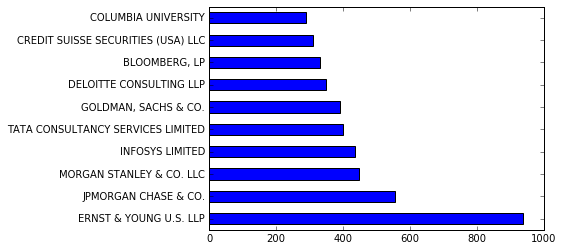

In [7]:
%matplotlib inline

import matplotlib.pyplot as mlp

q1_set['lca_case_employer_name'].value_counts()[:10].plot(kind = 'barh', rot = 0)

In [8]:
#1.2. Calculate the mean and standard deviation of wages proposed for workers 
#located in New York City and Mountain View. 
#Are the average wages in these two locations statistically different? What factors could explain the results?

#looking at only the full time positions filled
NYC_set = h1b_data[(h1b_data.lca_case_workloc1_city=='NEW YORK') & (h1b_data.full_time_pos=='Y') ]
MV_set = h1b_data[(h1b_data.lca_case_workloc1_city=='MOUNTAIN VIEW') & (h1b_data.full_time_pos=='Y') ]

print("Number of applicants in NY:")
print(len(NYC_set))

print("Number of applicants in MV:")
print(len(MV_set))

MV_set.head()

#find median and standard deviation of wages (from amd to) in NYC of applicants:
print("Mean starting wages in NYC:",NYC_set.lca_case_wage_rate_from.mean())
print("Mean upper slab wages in NYC:",NYC_set.lca_case_wage_rate_to.mean())
print("Standard Deviation starting wages in NYC:",NYC_set.lca_case_wage_rate_from.std())
print("Standard Deviation upper slab wages in NYC:",NYC_set.lca_case_wage_rate_to.std())
print("----------------")
print("Mean starting wages in Mountain View:",MV_set.lca_case_wage_rate_from.mean())
print("Mean upper slab wages in Mountain View:",MV_set.lca_case_wage_rate_to.mean())
print("Standard Deviation starting wages in Mountain View:",MV_set.lca_case_wage_rate_from.std())
print("Standard Deviation upper slab wages in Mountain View:",MV_set.lca_case_wage_rate_to.std())
##There is a large difference in the mean of the wages range of NYC employees and Mountain View, California employees.

Number of applicants in NY:
30720
Number of applicants in MV:
5314
Mean starting wages in NYC: 92056.36496321605
Mean upper slab wages in NYC: 119704.31182443774
Standard Deviation starting wages in NYC: 92787.39812610645
Standard Deviation upper slab wages in NYC: 86832.56641825063
----------------
Mean starting wages in Mountain View: 111964.93638878432
Mean upper slab wages in Mountain View: 138984.1280215475
Standard Deviation starting wages in Mountain View: 32416.437661215907
Standard Deviation upper slab wages in Mountain View: 41169.11237620894


In [9]:
#the standard deviation is lesser for Mountain View than for NYC.
#possible reasons for the difference?
    #1.  Technology jobs v.s. Finance jobs: The Mountain View Dataset has nearly 
    #$20,000 as the margin in proposed wages on average compared to NYC. This margin is observed across 
    #most metrics, including percentiles.
    #Most technology jobs require highly 
    #skilled workers, mostly with higher education degrees like Masters and PhDs. Who are paid in higher 
    #slabs due to their qualifications.

    #2. STEM vaccum and Indian IT firms: As it is known, STEM visas are given preference and most STEM jobs are 
    #in the Silicon Valley. Most of the STEM jobs are infact filled by highly skilled immgrants. If seen on the 
    #national scale, the companies that apply for the most H1B applications are Indian technology companies or US 
    #companies with a strong support presence in India such as Infosys and Tata Consultancy Services. 
    #They bring skilled workers from India who can be paid lesser in comparision to someone from the US 
    #having the same qualifications.
    
    #break down by SOC_name reveals the above expectations. While the top number of applications in both 
    #belong to computer science jobs. The top 10 jobs in MV are all technology related
    #while the ranked listin NYC has financial analysts, Market Research, Auditors, etc. These fields have American 
    #people sufficiently filling job openings and thus fewer immigrants work in these areas.
    #Another point to note
    
    #3. Lifestyle: Expenses in lifestyle differences in the two cities also factor in. 
    #NYC and MV both have high rent expenditure but California jobs require car travel and maintenance. 
    #NYC's convenient subway system eliminates that additional expenditure. 
    #The minimum pay in California is also much higher than NY.
    
    
print("Mountain View:")
print( MV_set.lca_case_soc_name.value_counts()[:10])
print(MV_set.describe())
print("------------------------------------------")
print("NYC:")
print(NYC_set.lca_case_soc_name.value_counts()[:10])
print(NYC_set.describe())

Mountain View:
Software Developers, Applications                     2748
Computer Systems Analysts                              510
Computer Occupations, All Other                        415
Software Developers, Systems Software                  312
Computer Programmers                                   220
Network and Computer Systems Administrators             96
Computer and Information Systems Managers               75
Computer and Information Research Scientists            69
Computer Hardware Engineers                             66
Market Research Analysts and Marketing Specialists      64
Name: lca_case_soc_name, dtype: int64
       lca_case_wage_rate_from  lca_case_wage_rate_to  total_workers  \
count              5314.000000            1021.000000    5314.000000   
mean             111964.936389          138984.128022       2.124012   
std               32416.437661           41169.112376       8.662039   
min                  22.370000              40.000000       1.000000 

observe value of correlation(pearson's) between total_workers vs lca_case_wage_rate_from:
-0.0190361257202


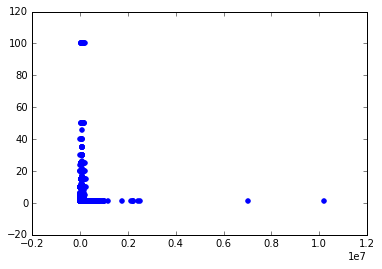

In [12]:
#1.3. For NYC, what is the relationship between the total number of H­1B visas requested by an employer 
#and the average wages proposed? Visually represent this relationship if appropriate. 
#Is the relationship statistically significant? What might explain this relationship?

print("observe value of correlation(pearson's) between total_workers vs lca_case_wage_rate_from:")

#We observe a negative correlation which is closer to 0 than -1 between the number of workers and the wage rate.
#Thus there is no linear correlation between the two.

print(NYC_set.total_workers.corr(NYC_set.lca_case_wage_rate_from))


#perform regression on total_workers vs lca_case_wage_rate_from:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

totalworkers_set = NYC_set['total_workers']

wage_set = NYC_set['lca_case_wage_rate_from']

plt.scatter(wage_set ,totalworkers_set,color='blue')

#One can observe from the scatterplot below that as the number of workers increases, 
#the wage rate does not see any significant change.

In [ ]:
#2. Brainstorming:

#1.	Find the work locations (state or city) for the top 10 companies with the highest number of applications. 

#2.	Find the most popular jobs for immigrants and the payscale.
    #a.	Group by SOC Name and sort in descending order of count of applications.
    
#3.	Observe whether H1B immigrants fall below or above the wage rate of a location /state. 
    #This can be used as a means of establishing whether immigrants tend to fall into a higher 
    #income bracket than the national. Additionally, Observe the pay by Indian IT consulting 
    #firms and the pay of that location/state

#4. If we connect this data with the educational qualifications of the applicants, 
    #we can observe how many are educated in the United States and how many come directly 
    #as workers from foreign countries. 

In [20]:
#3.Find the work locations (state or city) for the top 10 companies with the highest number of applications.
    #Steps -
    #a.	Pull out the top ten companies from the dataframe into a list.
    #b.	Filter the dataframe against these top 10 companies into a new dataframe.
    #c.	Group the number of applications by work location and the companies.

    #Insight - 
    #We observe the cities in which companies hiring the most number of immigrants. 

popular = pd.DataFrame(h1b_data.groupby(['lca_case_employer_name','lca_case_workloc1_city'])['total_workers'].sum())

popular.sort_values('total_workers',ascending = False).head(n=50)

,,total_workers
lca_case_employer_name,lca_case_workloc1_city,
DELOITTE CONSULTING LLP,PHILADELPHIA,13808
"PRICEWATERHOUSECOOPERS, LLP",NEW YORK,5835
APPLE INC.,CUPERTINO,5609
MICROSOFT CORPORATION,REDMOND,4365
"SYNOPSYS, INC.",MOUNTAIN VIEW,4255
AMAZON CORPORATE LLC,SEATTLE,3978
"CISCO SYSTEMS, INC.",SAN JOSE,3407
"PRICEWATERHOUSECOOPERS, LLP",SAN JOSE,3280
COGNIZANT TECHNOLOGY SOLUTIONS U.S. CORPORATION,TEANECK,3256


In [36]:
#additional lists of observations:

#the companies with the maximum number of applications
h1b_data.lca_case_employer_name.value_counts()[1:20]

TATA CONSULTANCY SERVICES LIMITED                  14098
WIPRO LIMITED                                       8365
DELOITTE CONSULTING LLP                             7017
ACCENTURE LLP                                       5498
IBM INDIA PRIVATE LIMITED                           5029
HCL AMERICA, INC.                                   4749
ERNST & YOUNG U.S. LLP                              3961
LARSEN & TOUBRO INFOTECH LIMITED                    3939
MICROSOFT CORPORATION                               3750
IGATE TECHNOLOGIES INC.                             3124
GOOGLE INC.                                         2951
INTEL CORPORATION                                   2506
IBM CORPORATION                                     2457
COGNIZANT TECHNOLOGY SOLUTIONS U.S. CORPORATION     2358
TECH MAHINDRA (AMERICAS), INC.                      1932
DELOITTE & TOUCHE LLP                               1628
AMAZON CORPORATE LLC                                1596
APPLE INC.                     

In [38]:
#the states with the maximum numberof applications
h1b_data.lca_case_workloc1_state.value_counts()[1:20]

TX    51851
NY    48882
NJ    36783
IL    27412
MA    19914
PA    19152
WA    17921
GA    17729
FL    17644
VA    15475
MI    13919
NC    13551
OH    13515
MD     9602
MN     8998
CT     8917
AZ     7307
MO     6200
CO     5811
Name: lca_case_workloc1_state, dtype: int64